In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load and clean the data
df = pd.read_csv(r"C:\Users\admin\Downloads\matches.csv")


In [2]:
df.head(4)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper


In [3]:
df.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [4]:
df.shape

(1095, 20)

In [5]:
# Drop 'method' — too many missing values
df.drop(columns='method', inplace=True)

In [6]:
# Drop rows where winner or player_of_match is missing (optional)
df.dropna(subset=['winner', 'player_of_match'], inplace=True)

In [7]:
# Fill result_margin with 0 where result is 'no result' or 'tie'
df['result_margin'].fillna(0, inplace=True)

# Same for target_runs and target_overs — optional: fill with 0
df['target_runs'].fillna(0, inplace=True)
df['target_overs'].fillna(0, inplace=True)

In [8]:
# Create mapping from venue to most common city
venue_city_map = df.dropna(subset=['city']).groupby('venue')['city'].agg(lambda x: x.mode()[0]).to_dict()


In [9]:
# Fill missing cities using venue → city mapping
df['city'] = df.apply(
    lambda row: venue_city_map[row['venue']] if pd.isna(row['city']) and row['venue'] in venue_city_map else row['city'],
    axis=1
)


In [10]:
df.drop(columns=['id'], inplace=True)

In [11]:
df['toss_match_winner'] = (df['toss_winner'] == df['winner'])


In [12]:
df['is_super_over'] = df['super_over'] == 1


In [13]:
home_grounds = {
    'Mumbai Indians': 'Mumbai',
    'Chennai Super Kings': 'Chennai',
    'Royal Challengers Bangalore': 'Bangalore',
    'Kolkata Knight Riders': 'Kolkata',
    'Delhi Capitals': 'Delhi',
    'Sunrisers Hyderabad': 'Hyderabad',
    'Rajasthan Royals': 'Jaipur',
    'Punjab Kings': 'Mohali',
    'Lucknow Super Giants': 'Lucknow',
    'Gujarat Titans': 'Ahmedabad'
}


In [14]:
df['home_team'] = df.apply(
    lambda row: row['team1'] if home_grounds.get(row['team1']) == row['city']
    else (row['team2'] if home_grounds.get(row['team2']) == row['city']
    else 'Neutral'), axis=1)


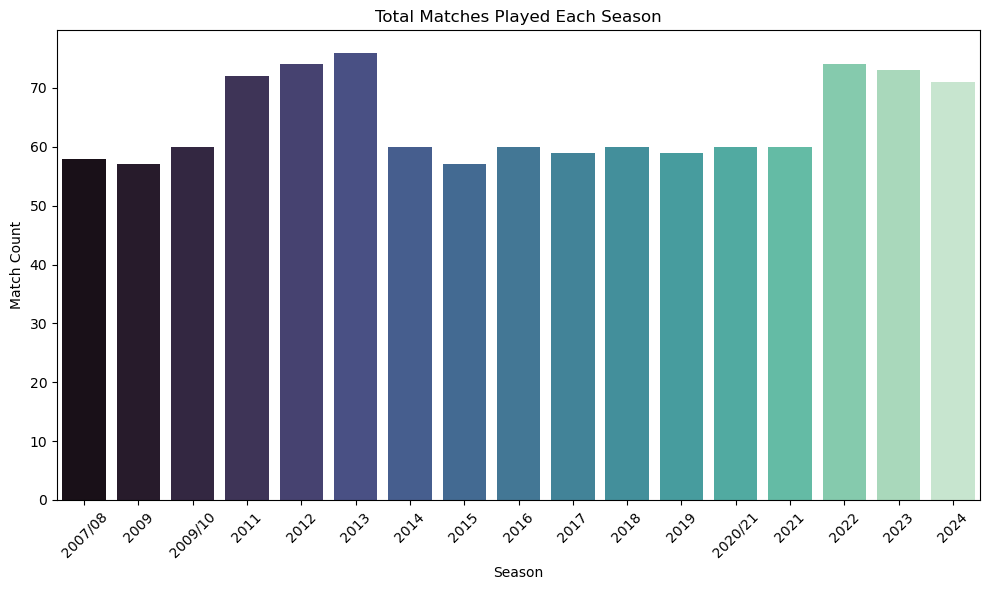

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

season_counts = df['season'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=season_counts.index, y=season_counts.values, palette="mako")
plt.title('Total Matches Played Each Season')
plt.xlabel('Season')
plt.ylabel('Match Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


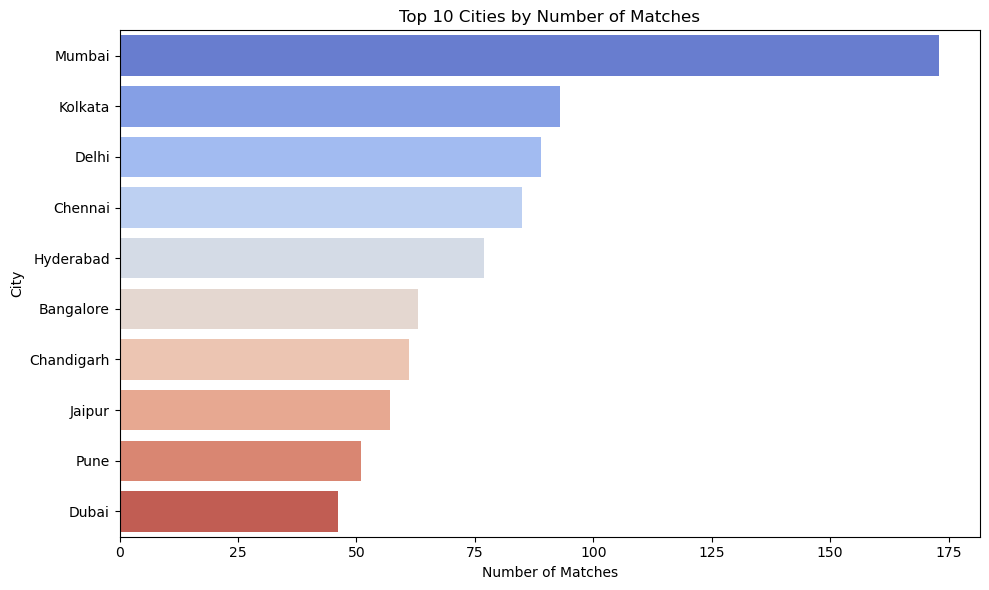

In [16]:
city_counts = df['city'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=city_counts.values, y=city_counts.index, palette="coolwarm")
plt.title('Top 10 Cities by Number of Matches')
plt.xlabel('Number of Matches')
plt.ylabel('City')
plt.tight_layout()
plt.show()


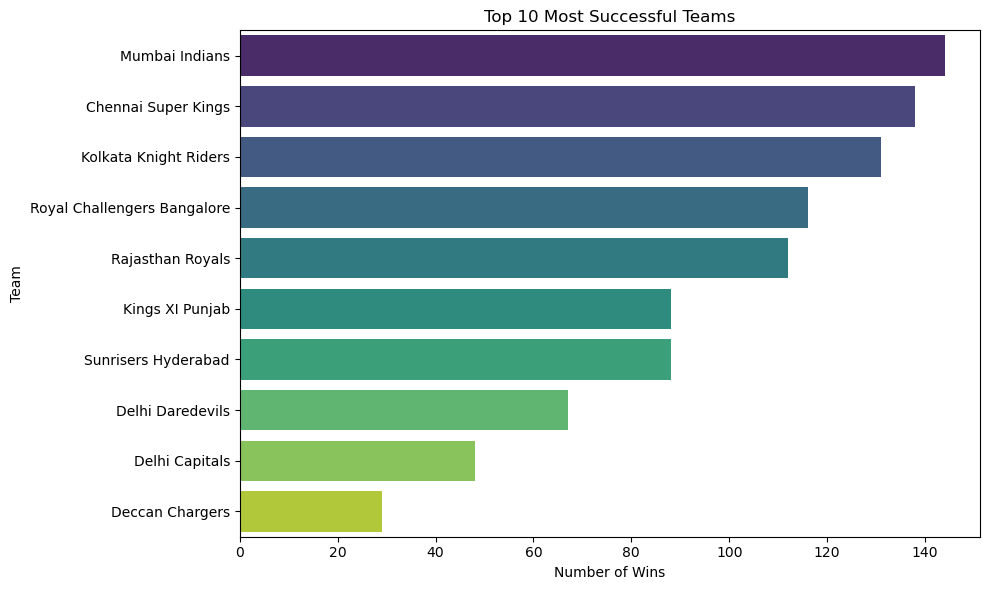

In [17]:
top_winners = df['winner'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_winners.values, y=top_winners.index, palette="viridis")
plt.title('Top 10 Most Successful Teams')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.tight_layout()
plt.show()


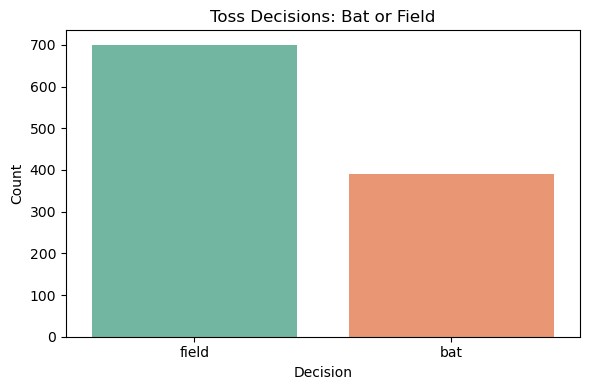

In [18]:
toss_decision_counts = df['toss_decision'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=toss_decision_counts.index, y=toss_decision_counts.values, palette="Set2")
plt.title('Toss Decisions: Bat or Field')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


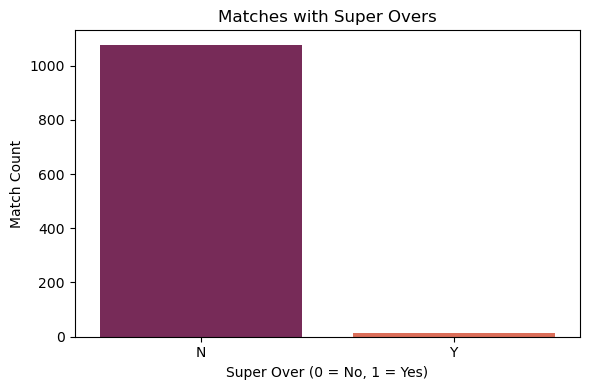

In [19]:
super_over_count = df['super_over'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=super_over_count.index.astype(str), y=super_over_count.values, palette="rocket")
plt.title('Matches with Super Overs')
plt.xlabel('Super Over (0 = No, 1 = Yes)')
plt.ylabel('Match Count')
plt.tight_layout()
plt.show()


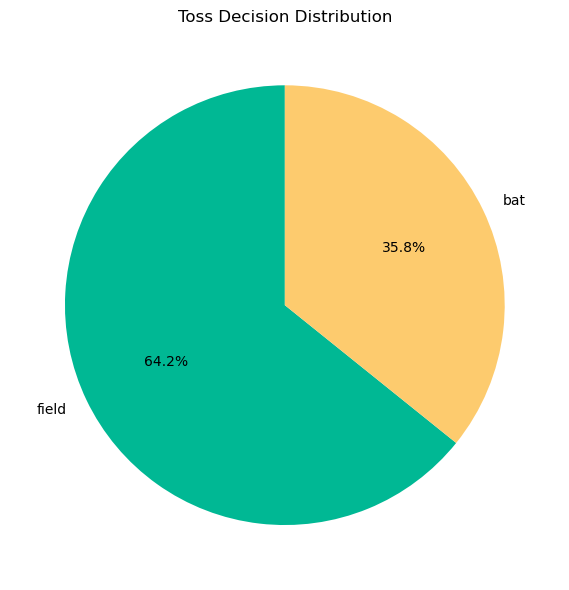

In [20]:
plt.figure(figsize=(6,6))
df['toss_decision'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#00b894', '#fdcb6e'])
plt.title('Toss Decision Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


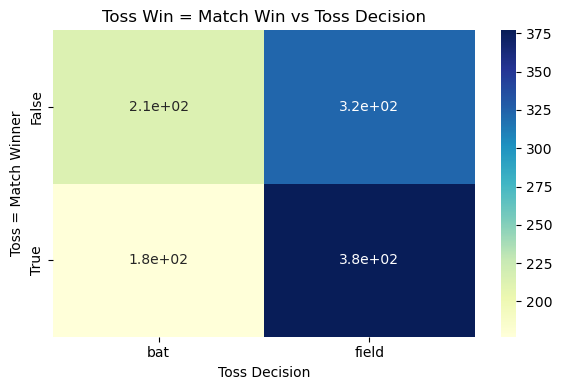

In [21]:
heat_df = df[df['winner'].notna()]
heat_df['toss_win'] = heat_df['toss_winner'] == heat_df['winner']
ct = pd.crosstab(heat_df['toss_win'], heat_df['toss_decision'])

plt.figure(figsize=(6,4))
sns.heatmap(ct, annot=True, cmap='YlGnBu')
plt.title('Toss Win = Match Win vs Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Toss = Match Winner')
plt.tight_layout()
plt.show()


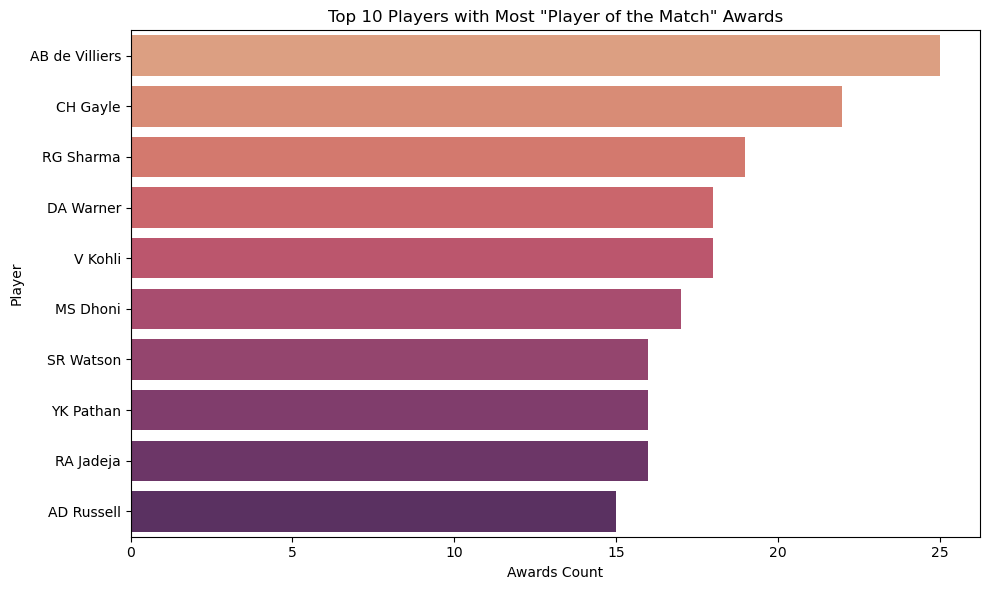

In [23]:
top_players = df['player_of_match'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_players.values, y=top_players.index, palette='flare')
plt.title('Top 10 Players with Most "Player of the Match" Awards')
plt.xlabel('Awards Count')
plt.ylabel('Player')
plt.tight_layout()
plt.show()


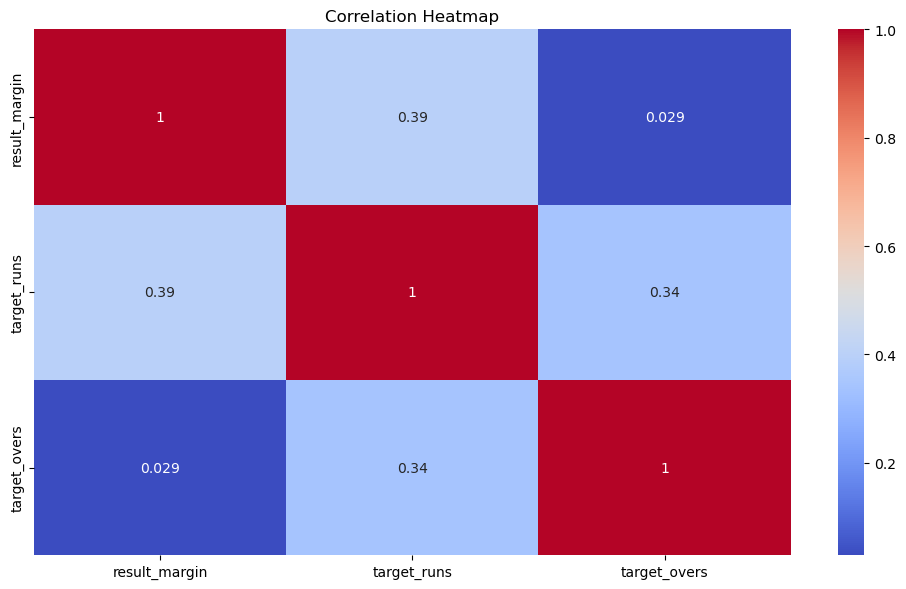

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


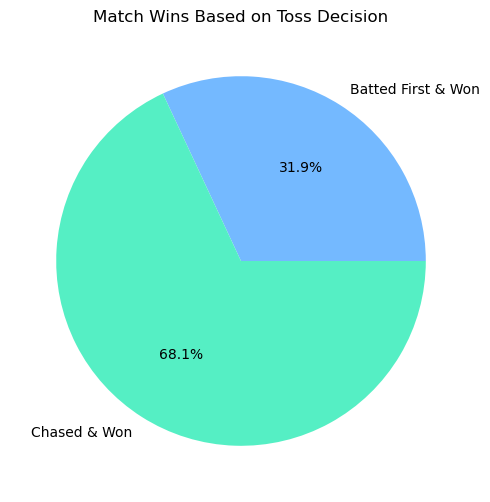

In [25]:
bat_first_win = df[(df['toss_decision'] == 'bat') & (df['toss_winner'] == df['winner'])]
chase_win = df[(df['toss_decision'] == 'field') & (df['toss_winner'] == df['winner'])]

labels = ['Batted First & Won', 'Chased & Won']
sizes = [len(bat_first_win), len(chase_win)]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#74b9ff', '#55efc4'])
plt.title('Match Wins Based on Toss Decision')
plt.show()



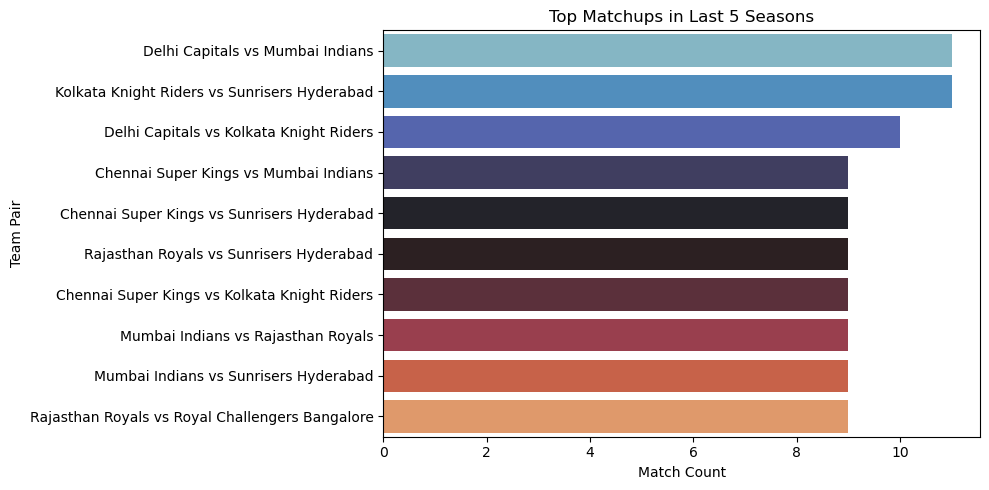

In [26]:
finals = df[df['season'].isin(df['season'].unique()[-5:])]  # last 5 seasons
pairs = finals.apply(lambda row: tuple(sorted([row['team1'], row['team2']])), axis=1)
pair_counts = pairs.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=pair_counts.values, y=pair_counts.index.map(lambda x: f"{x[0]} vs {x[1]}"), palette='icefire')
plt.title('Top Matchups in Last 5 Seasons')
plt.xlabel('Match Count')
plt.ylabel('Team Pair')
plt.tight_layout()
plt.show()


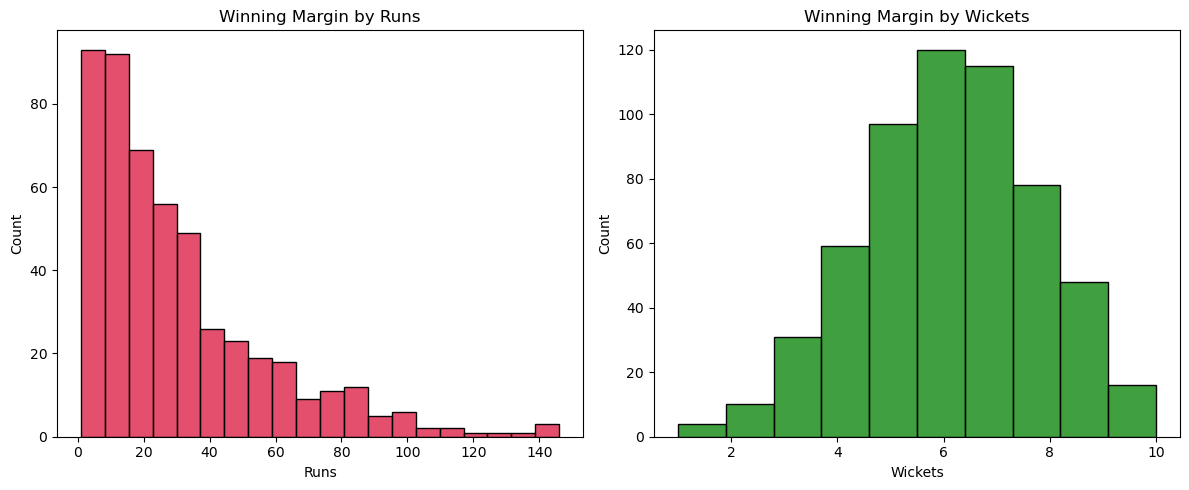

In [27]:
by_runs = df[df['result'] == 'runs']['result_margin']
by_wickets = df[df['result'] == 'wickets']['result_margin']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(by_runs, bins=20, color='crimson')
plt.title('Winning Margin by Runs')
plt.xlabel('Runs')

plt.subplot(1, 2, 2)
sns.histplot(by_wickets, bins=10, color='green')
plt.title('Winning Margin by Wickets')
plt.xlabel('Wickets')

plt.tight_layout()
plt.show()


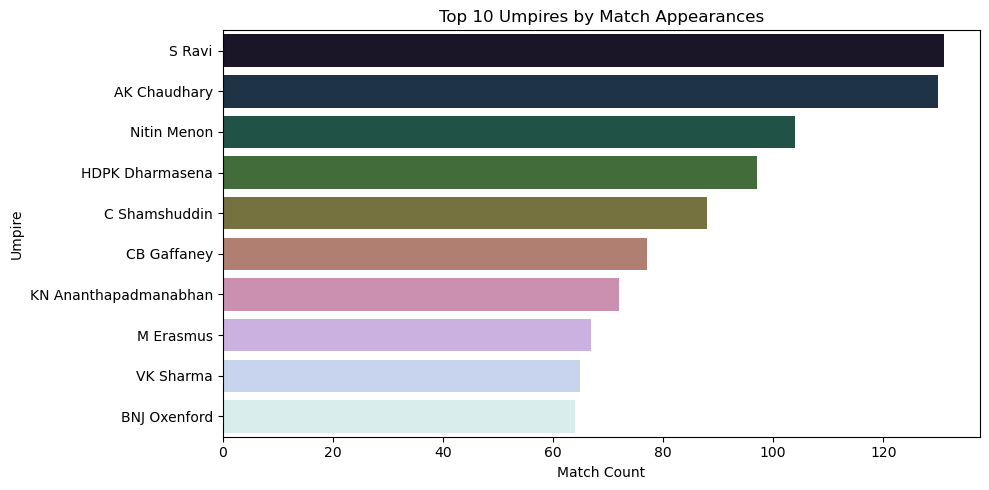

In [28]:
umpire_counts = pd.concat([df['umpire1'], df['umpire2']]).value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=umpire_counts.values, y=umpire_counts.index, palette='cubehelix')
plt.title('Top 10 Umpires by Match Appearances')
plt.xlabel('Match Count')
plt.ylabel('Umpire')
plt.tight_layout()
plt.show()


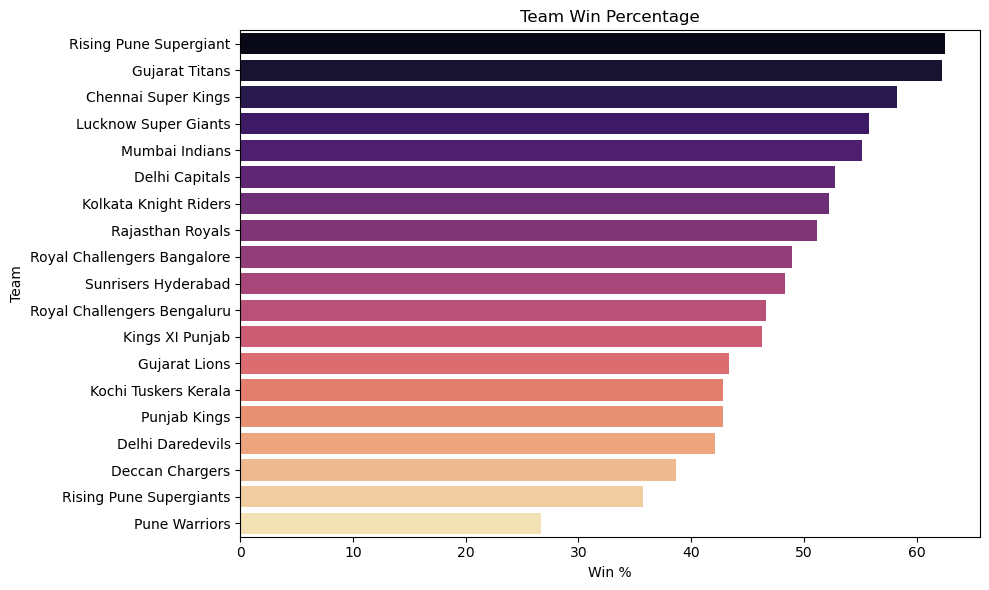

In [29]:
total_matches = df['team1'].value_counts() + df['team2'].value_counts()
win_counts = df['winner'].value_counts()
win_percent = (win_counts / total_matches * 100).sort_values(ascending=False).dropna()

plt.figure(figsize=(10,6))
sns.barplot(x=win_percent.values, y=win_percent.index, palette='magma')
plt.title('Team Win Percentage')
plt.xlabel('Win %')
plt.ylabel('Team')
plt.tight_layout()
plt.show()


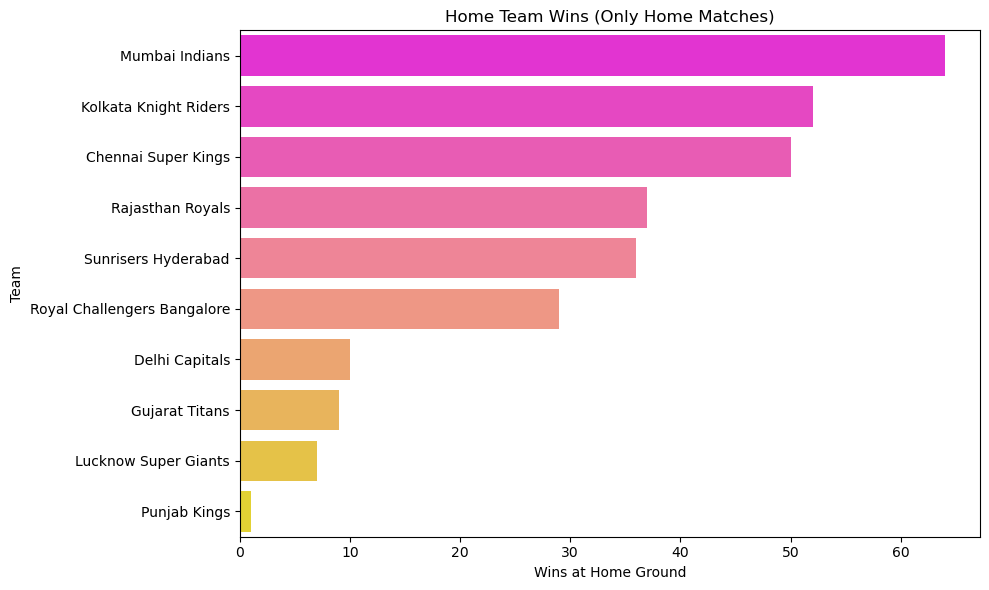

In [30]:
home_matches = df[df['home_team'] != 'Neutral']
home_win = home_matches[home_matches['home_team'] == home_matches['winner']]
home_advantage = home_win['home_team'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=home_advantage.values, y=home_advantage.index, palette='spring')
plt.title('Home Team Wins (Only Home Matches)')
plt.xlabel('Wins at Home Ground')
plt.ylabel('Team')
plt.tight_layout()
plt.show()
